# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json


# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)
#for city in cities:
#    city_name = city.replace(" ", "%20")

# Print the city count to confirm sufficient count
len(cities)


622

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [3]:
#set up variables to be needed later
url = "http://api.openweathermap.org/data/2.5/weather?q="
url
#print(requests.get(url))
units = "imperial"
city_no = []
temp = []
lat = []
long = []
humidity = []
cloud = []
wind = []
country = []
date_time = []
weather_json = []
weather_city = []
city_check = []
import time
page=0


#find all necessary data for each city in the cities list
for city in cities:
   
    query_url = f"{url}{city}&appid={weather_api_key}&units={units}"
    #print(query_url)
    weather_response = requests.get(query_url).json()
    #handle exceptions/errors
    try:
        weather_response["weather"]
    except KeyError:
        print(f'no {city} data is available')
        continue
    #append lists with new data
    lat.append(weather_response['coord']['lat'])
    long.append(weather_response['coord']['lon'])
    temp.append(weather_response['main']['temp'])
    humidity.append(weather_response['main']['humidity'])
    cloud.append(weather_response['clouds']['all'])
    wind.append(weather_response['wind']['speed'])
    country.append(weather_response['sys']['country'])
    date_time.append(weather_response['dt'])
    weather_city.append(city)

    print(f'Name: {weather_response["name"]} ID: {weather_response["id"]}')
        

Name: Butaritari ID: 2110227
Name: Aklavik ID: 5882953
Name: Cayenne ID: 3382160
Name: Galveston ID: 4692856
Name: Kavieng ID: 2094342
Name: Chui ID: 3443061
Name: Nyimba ID: 900056
no hunza data is available
Name: Clyde River ID: 5924351
Name: Phanom Sarakham ID: 1607801
Name: Fort Payne ID: 4062861
no saleilua data is available
Name: Okha ID: 2122614
Name: Jamestown ID: 5122534
Name: Vyartsilya ID: 470762
Name: Hilo ID: 5855927
Name: Killybegs ID: 2963295
Name: Cherskiy ID: 2126199
Name: Castro ID: 3466704
Name: Samfya ID: 899274
Name: Carnarvon ID: 2074865
Name: Tasiilaq ID: 3424607
Name: Alamogordo ID: 5454627
Name: Tuktoyaktuk ID: 6170031
Name: Ostrovnoy ID: 556268
Name: Balsas ID: 3406545
Name: Kudahuvadhoo ID: 1337607
Name: Padang ID: 1633419
Name: Bredasdorp ID: 1015776
Name: Rikitea ID: 4030556
Name: Qui Nhon ID: 1568574
Name: Youghal ID: 2960869
Name: Galle ID: 1246294
no bolungarvik data is available
Name: Srednekolymsk ID: 2121025
Name: Salalah ID: 286621
no grand river sou

Name: Qian’an ID: 2035410
Name: Gamboula ID: 2386756
no umzimvubu data is available
Name: Lagoa ID: 3372964
no doctor pedro p. pena data is available
Name: Fortuna ID: 5563839
no safwah data is available
Name: Buala ID: 2109528
Name: Griffith ID: 4920986
Name: Saint-Paul ID: 935221
Name: Coquimbo ID: 3893629
Name: Lazarev ID: 2123836
Name: Rafrāf ID: 2467813
Name: Sergiyevsk ID: 486626
no zhanatas data is available
Name: Longhua ID: 1802618
Name: Kodinsk ID: 1503037
Name: Illapel ID: 3887344
Name: Poltavka ID: 1494500
Name: Aykhal ID: 2027296
Name: Kushiro ID: 2129376
Name: Kamaishi ID: 2112444
Name: Necochea ID: 3430443
Name: Niquero ID: 3545981
Name: Goma ID: 216281
Name: Ipixuna ID: 3408424
Name: Ardakān ID: 143073
Name: Bilibino ID: 2126682
Name: Kembaran ID: 1621395
Name: Bambous Virieux ID: 1106677
Name: Auki ID: 2109701
Name: Nuuk ID: 3421319
Name: Upernavik ID: 3418910
Name: Bahile ID: 1696177
Name: Qaqortoq ID: 3420846
Name: Sambava ID: 1056899
Name: Odienné ID: 2283016
Name: 

Name: Umeå ID: 602150
Name: Lixouri ID: 258175
Name: Pinhão ID: 3453777
Name: Turaif ID: 101312
Name: Esso ID: 2125711
Name: Hurghada ID: 361291
Name: Pangkalanbuun ID: 1632694
Name: Tavda ID: 1489962
Name: Guarapari ID: 3461888
Name: Mount Darwin ID: 885800
Name: Shediac ID: 6145668
Name: Puerto Escondido ID: 3520994
Name: Fort-Shevchenko ID: 609906
Name: Trofors ID: 3133983
Name: Lahaina ID: 5849996
Name: Ulladulla ID: 2145554
Name: Pisco ID: 3932145
Name: Buk ID: 3102138
Name: Troitsko-Pechorsk ID: 481548
Name: Beşikdüzü ID: 750735
Name: ‘Āhuimanu ID: 5856516
Name: Charagua ID: 3921141
Name: Paamiut ID: 3421193
Name: Lerwick ID: 2644605
Name: Ruteng ID: 1629380
Name: Taunggyi ID: 1293960
Name: Presidencia Roque Sáenz Peña ID: 3840300
Name: Phanat Nikhom ID: 1607838


In [4]:
#create dictionary to use for later tasks
weather_dict = {
    "city": weather_city,
    "lat": lat,
    "long": long,
    "temp": temp,
    "humidity": humidity,
    "cloud": cloud,
    "wind": wind,
    "country":country,
    "date and time":date_time
}



In [5]:
#check lengths of each dictionary
print(len(weather_city))
print(len(lat))
print(len(temp))
print(len(humidity))
print(len(cloud))
print(len(wind))

568
568
568
568
568
568


### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_data_df = pd.DataFrame(data=weather_dict)

weather_data_df.to_csv('output.csv', index=False)
weather_data_df

,city,lat,long,temp,humidity,cloud,wind,country,date and time
0,butaritari,3.0707,172.7902,80.76,81,72,12.37,KI,1615657191
1,aklavik,68.2191,-135.0107,-22.00,76,20,3.44,CA,1615657442
2,cayenne,4.9333,-52.3333,84.27,62,40,11.50,GF,1615657196
3,galveston,29.3669,-94.9669,72.28,78,75,11.50,US,1615657443
4,kavieng,-2.5744,150.7967,81.30,65,0,4.81,PG,1615657443
...,...,...,...,...,...,...,...,...,...
563,lerwick,60.1545,-1.1494,42.80,87,75,17.27,GB,1615657630
564,ruteng,-8.6136,120.4721,62.40,91,95,0.31,ID,1615657631
565,taunggyi,20.7833,97.0333,61.09,35,0,1.59,MM,1615657631
566,presidencia roque saenz pena,-26.7852,-60.4388,103.35,16,80,2.30,AR,1615657631


## Inspect the data and remove the cities where the humidity > 100%.
----
Skip this step if there are no cities that have humidity > 100%. 

In [7]:
#look for cities that have humidity of more than 100%
weather_data_df.loc[weather_data_df['humidity']>100]

#originally looked at box and whisker plot to see data, then checked a different way
#fig1, ax1 = plt.subplots()
#ax1.set_title('City')
#ax1.set_ylabel('Humidity')
#ax1.boxplot(humidity)
#plt.show()

,city,lat,long,temp,humidity,cloud,wind,country,date and time


In [8]:
# Make a new DataFrame equal to the city data to drop all humidity outliers by index.
# Passing "inplace=False" will make a copy of the city_data DataFrame, which we call "clean_city_data".


## Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

## Latitude vs. Temperature Plot

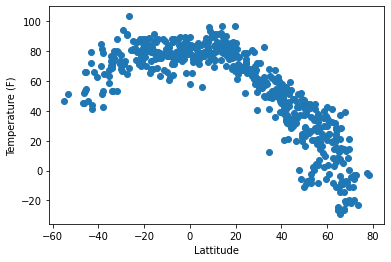

This graph shows how the temperature is related to the lattitude. In the both hemispheres,
the closer you are to the equator (lattitude 0), the higher your temperature. In the Northern hemisphere,
since it is winter, it gets much colder as you go closer to the North pole, while in the Southern hemisphere
since it is summer, the change is not as drastic. Also, there are not any cities that could be pulled close
to the South Pole since there are no cities in Antarctica.


In [9]:
import scipy.stats as st
plt.scatter(lat,temp)
plt.xlabel('Lattitude')
plt.ylabel('Temperature (F)')

plt.savefig("latvtemp.png")

plt.show()
print(f'This graph shows how the temperature is related to the lattitude. In the both hemispheres,')
print(f'the closer you are to the equator (lattitude 0), the higher your temperature. In the Northern hemisphere,')
print(f'since it is winter, it gets much colder as you go closer to the North pole, while in the Southern hemisphere')
print(f'since it is summer, the change is not as drastic. Also, there are not any cities that could be pulled close')
print('to the South Pole since there are no cities in Antarctica.')

## Latitude vs. Humidity Plot

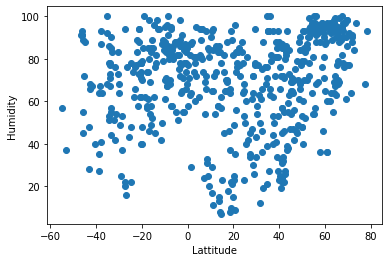

This graph shows that the humidity and lattitude of each city that was analyzed. Since humidity typically
deals with one of two things, how close you are to the coast or what your daily weather is, more than lattitude,
this variabilty is not surprising.


In [10]:
plt.scatter(lat,humidity)
plt.xlabel('Lattitude')
plt.ylabel('Humidity')

plt.savefig("latvhum.png")

plt.show()

print(f'This graph shows that the humidity and lattitude of each city that was analyzed. Since humidity typically')
print(f'deals with one of two things, how close you are to the coast or what your daily weather is, more than lattitude,')
print(f'this variabilty is not surprising.')

## Latitude vs. Cloudiness Plot

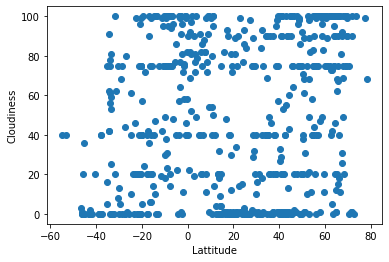

This plot analyzes cloudiness and lattitude. It seems to imply that most of the cloudiness is measure by percent
cloud cover which is why there are lines at each of the multiples of 20 or 25. It is easy to measure by saying 20
or 25 percent cloud cover.


In [11]:
plt.scatter(lat, cloud)
plt.xlabel('Lattitude')
plt.ylabel('Cloudiness')

plt.savefig("latvcloud.png")

plt.show()

print(f'This plot analyzes cloudiness and lattitude. It seems to imply that most of the cloudiness is measure by percent')
print(f'cloud cover which is why there are lines at each of the multiples of 20 or 25. It is easy to measure by saying 20')
print(f'or 25 percent cloud cover.')

## Latitude vs. Wind Speed Plot

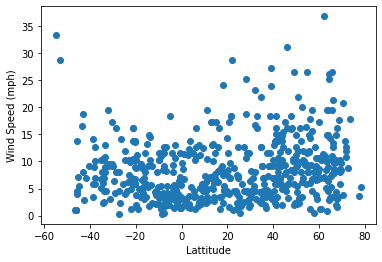

This plot shows wind speeds as it correlates to lattitude. While there are some interesting standouts, this will not
show the typical correlation most people will look for. Winds tend to be stronger along certain latitude lines, but
since they are also a factor of day to day weather, they do not tend to stand out the way people look for them.
You can see some groupings and some higher winds along those lattitude lines where the winds are usually stronger,
such as between the 35 and 55 degree lines, and lighter winds near the equator, but so many other factors are at play
it is hard to really tell what is going on.


In [21]:
plt.scatter(lat,wind)
plt.xlabel('Lattitude')
plt.ylabel('Wind Speed (mph)')

plt.savefig("latvwind.png")

plt.show()

print(f'This plot shows wind speeds as it correlates to lattitude. While there are some interesting standouts, this will not')
print(f'show the typical correlation most people will look for. Winds tend to be stronger along certain latitude lines, but')
print(f'since they are also a factor of day to day weather, they do not tend to stand out the way people look for them.')
print(f'You can see some groupings and some higher winds along those lattitude lines where the winds are usually stronger,')
print(f'such as between the 35 and 55 degree lines, and lighter winds near the equator, but so many other factors are at play')
print(f'it is hard to really tell what is going on.')

## Linear Regression

####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

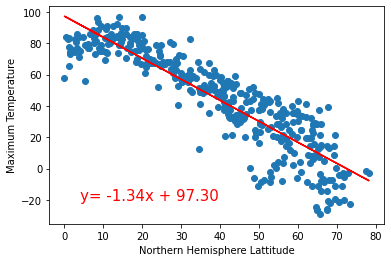

This graph shows a negative correlation between temperature and lattitude. As you move further away from the
equator, the temperature goes down. As it is winter in the Northern Hemisphere, this is to be expected.


In [13]:
northern_hem_df = weather_data_df.loc[weather_data_df['lat']>0]
x_values =northern_hem_df['lat']
y_values = northern_hem_df['temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,-20),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Lattitude')
plt.ylabel('Maximum Temperature')

plt.savefig("NH_tempvlat.png")

plt.show()

print(f'This graph shows a negative correlation between temperature and lattitude. As you move further away from the')
print(f'equator, the temperature goes down. As it is winter in the Northern Hemisphere, this is to be expected.')

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

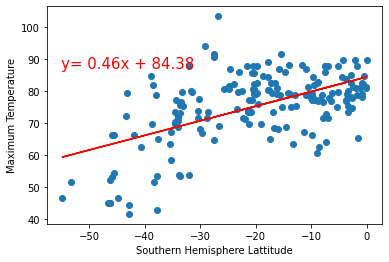

This graph does not show as much of a correlation as the one for the Northern Hemisphere, which also makes sense,
considering it is summer in the Southern Hemisphere. For Earth, the Sun is directly overhead at 23.5 degrees South
of the equator, which is why the temperatures go up from the more negative (closer to the poles) lattitudes towards
the 23.5 degrees, and then some of the temperatures start to decrease slightly.


In [14]:
southern_hem_df = weather_data_df.loc[weather_data_df['lat']<0]
x_values =southern_hem_df['lat']
y_values = southern_hem_df['temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,87),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Lattitude')
plt.ylabel('Maximum Temperature')

plt.savefig("SH_tempvlat.png")

plt.show()

print(f'This graph does not show as much of a correlation as the one for the Northern Hemisphere, which also makes sense,')
print(f'considering it is summer in the Southern Hemisphere. For Earth, the Sun is directly overhead at 23.5 degrees South')
print(f'of the equator, which is why the temperatures go up from the more negative (closer to the poles) lattitudes towards')
print(f'the 23.5 degrees, and then some of the temperatures start to decrease slightly.')

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

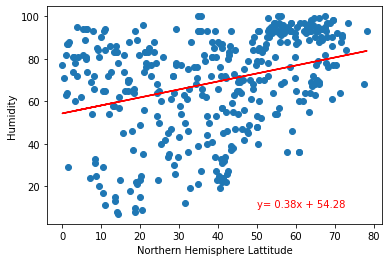

This graph shows a correlation between humidity and the distance from the equator. Since warm air can hold more
moisture, there is a much wider variety of humidities near the equator than closer to the poles. Since other variables
also affect humidity, how close you are to the coast or if you have rain that day because of a storm, the range in
humidity near the equator can be expected.


In [15]:
northern_hem_df = weather_data_df.loc[weather_data_df['lat']>0]
x_values =northern_hem_df['lat']
y_values = northern_hem_df['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,10),fontsize=10,color="red")
plt.xlabel('Northern Hemisphere Lattitude')
plt.ylabel('Humidity')

plt.savefig("NH_Humvlat.png")

plt.show()

print(f'This graph shows a correlation between humidity and the distance from the equator. Since warm air can hold more')
print(f'moisture, there is a much wider variety of humidities near the equator than closer to the poles. Since other variables')
print(f'also affect humidity, how close you are to the coast or if you have rain that day because of a storm, the range in')
print(f'humidity near the equator can be expected.')

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

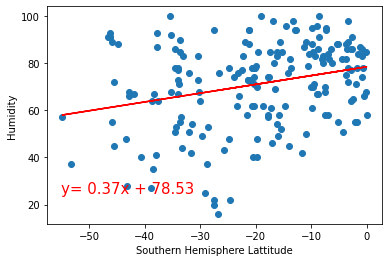

This graph shows less correlation between humidity and lattitude than the Northern Hemisphere, although the humidity
is much higher near the equator overall since the warmer air can hold more moisture.


In [16]:
southern_hem_df = weather_data_df.loc[weather_data_df['lat']<0]
x_values =southern_hem_df['lat']
y_values = southern_hem_df['humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,25),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Lattitude')
plt.ylabel('Humidity')

plt.savefig("SH_Humvlat.png")

plt.show()

print(f'This graph shows less correlation between humidity and lattitude than the Northern Hemisphere, although the humidity')
print(f'is much higher near the equator overall since the warmer air can hold more moisture.')

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

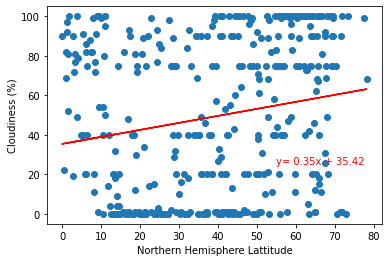

This graph shows little correlation between cloud cover and lattitude. There seems to be mostly just 100 percent,
75, 40, 20, or 0 percent cloud cover


In [17]:
northern_hem_df = weather_data_df.loc[weather_data_df['lat']>0]
x_values =northern_hem_df['lat']
y_values = northern_hem_df['cloud']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(55, 25),fontsize=10,color="red")
plt.xlabel('Northern Hemisphere Lattitude')
plt.ylabel('Cloudiness (%)')

plt.savefig("NH_Cloudvlat.png")

plt.show()

print(f'This graph shows little correlation between cloud cover and lattitude. There seems to be mostly just 100 percent,')
print(f'75, 40, 20, or 0 percent cloud cover')

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

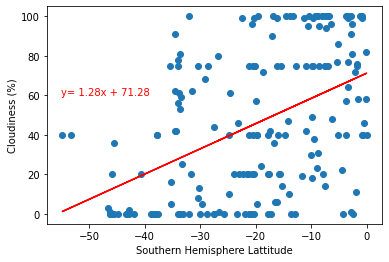

This graph shows less cloud cover than in the Northern Hemisphere overall. There are not as many places where there
are completely cloudless skies, but there is a wide range of various cloud cover in the Southern Hemisphere.


In [18]:
southern_hem_df = weather_data_df.loc[weather_data_df['lat']<0]
x_values =southern_hem_df['lat']
y_values = southern_hem_df['cloud']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,60),fontsize=10,color="red")
plt.xlabel('Southern Hemisphere Lattitude')
plt.ylabel('Cloudiness (%)')

plt.savefig("SH_Cloudvlat.png")

plt.show()

print(f'This graph shows less cloud cover than in the Northern Hemisphere overall. There are not as many places where there')
print(f'are completely cloudless skies, but there is a wide range of various cloud cover in the Southern Hemisphere.')

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

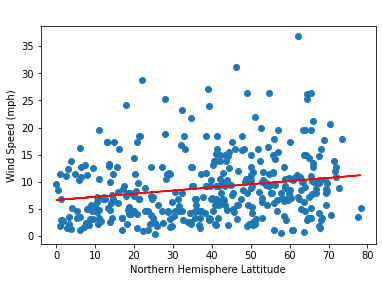

This graph shows that wind speeds are not really changed by distance from the equator for the Northern Hemisphere.


In [19]:
northern_hem_df = weather_data_df.loc[weather_data_df['lat']>0]
x_values =northern_hem_df['lat']
y_values = northern_hem_df['wind']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(4,40),fontsize=15,color="red")
plt.xlabel('Northern Hemisphere Lattitude')
plt.ylabel('Wind Speed (mph)')

plt.savefig("NH_Windvlat.png")

plt.show()

print(f'This graph shows that wind speeds are not really changed by distance from the equator for the Northern Hemisphere.')

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

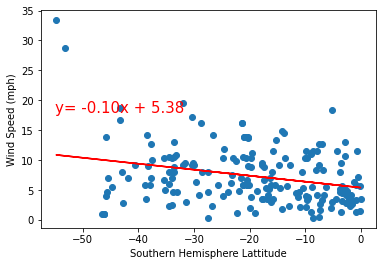

This graph shows that the winds in the Southern Hemisphere tend to decrease as you get closer to the equator. Winds
at the equator tend to be fairly calm unless there is a storm, so this makes sense.


In [20]:
southern_hem_df = weather_data_df.loc[weather_data_df['lat']<0]
x_values =southern_hem_df['lat']
y_values = southern_hem_df['wind']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
# line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
line_eq = f"y= {slope:.2f}x {'+' if intercept > 0 else ''} {intercept:.2f}"
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,18),fontsize=15,color="red")
plt.xlabel('Southern Hemisphere Lattitude')
plt.ylabel('Wind Speed (mph)')

plt.savefig("SH_Windvlat.png")

plt.show()

print(f'This graph shows that the winds in the Southern Hemisphere tend to decrease as you get closer to the equator. Winds')
print(f'at the equator tend to be fairly calm unless there is a storm, so this makes sense.')